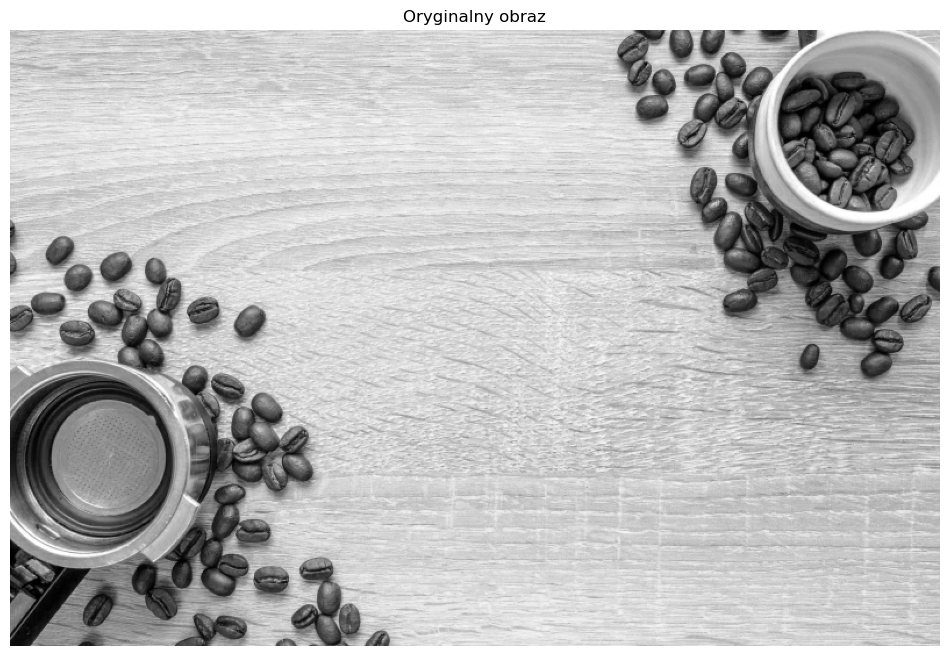

Liczba wartości singularnych: 530
Liczba wartości singularnych potrzebna, aby zachować 90% informacji: r = 227


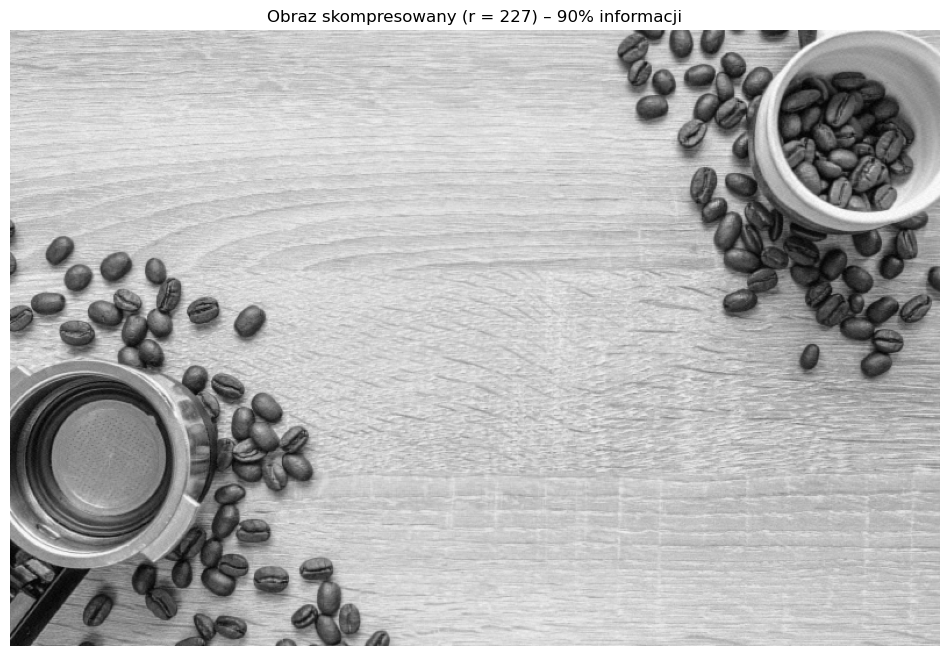

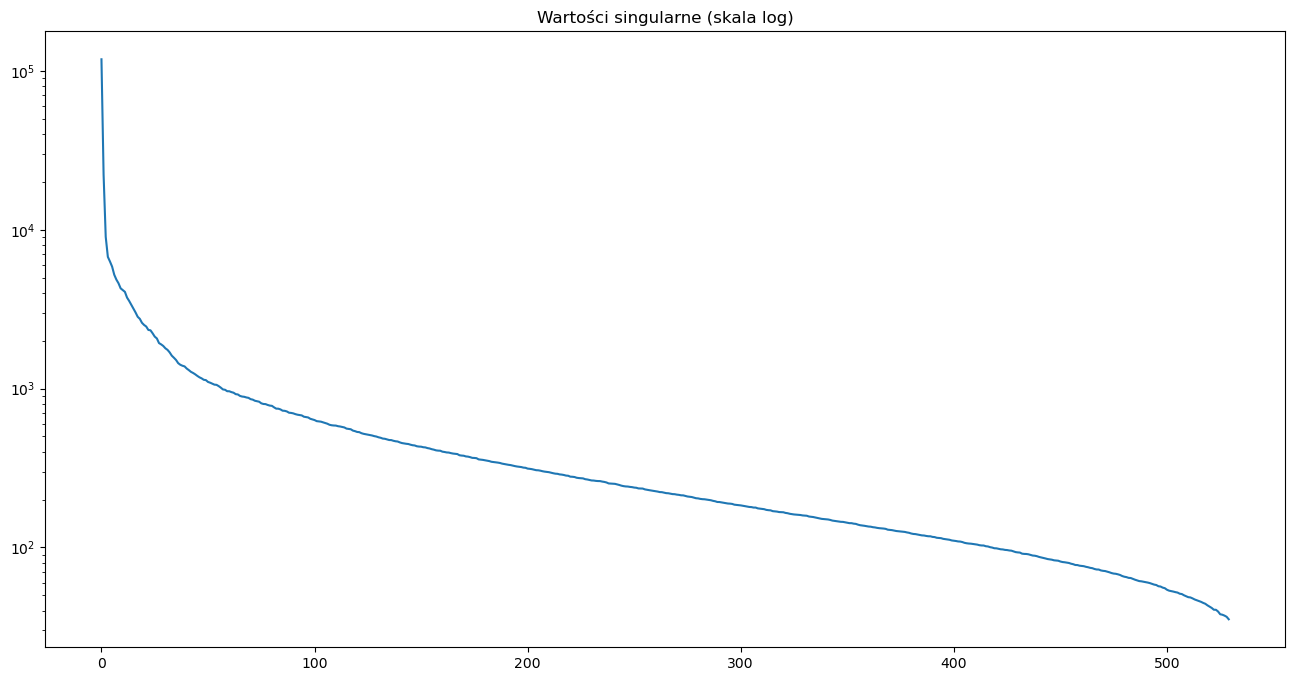

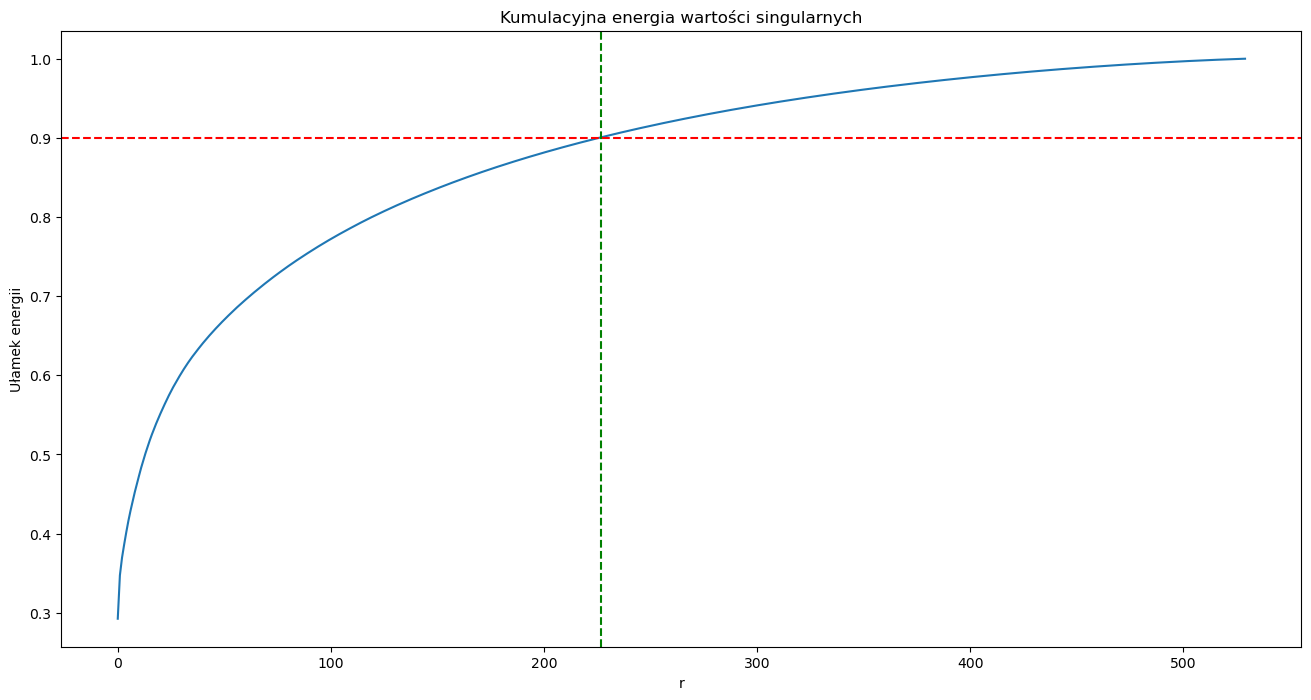

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

# konwersja do szarości
plt.rcParams['figure.figsize'] = [16,8]

A = imread('coffee.webp')    
X = np.mean(A, axis=-1)     

plt.imshow(X, cmap='gray')
plt.axis('off')
plt.title("Oryginalny obraz")
plt.show()

U, S, VT = np.linalg.svd(X, full_matrices=False)
print("Liczba wartości singularnych:", len(S))


energy = np.cumsum(S) / np.sum(S)   
r90 = np.searchsorted(energy, 0.90) + 1 

print(f"Liczba wartości singularnych potrzebna, aby zachować 90% informacji: r = {r90}")

S_diag = np.diag(S)

Xapprox = U[:, :r90] @ S_diag[:r90, :r90] @ VT[:r90, :]

plt.imshow(Xapprox, cmap='gray')
plt.axis('off')
plt.title(f"Obraz skompresowany (r = {r90}) – 90% informacji")
plt.show()

# wykresy
plt.figure()
plt.semilogy(S)
plt.title("Wartości singularne (skala log)")
plt.show()

plt.figure()
plt.plot(energy)
plt.axhline(0.9, color='r', linestyle='--')
plt.axvline(r90, color='g', linestyle='--')
plt.title("Kumulacyjna energia wartości singularnych")
plt.xlabel("r")
plt.ylabel("Ułamek energii")
plt.show()
